In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Carregar os datasets
chromecast_df = pd.read_csv("dataset_chromecast.csv")
smart_tv_df = pd.read_csv("dataset_smart-tv.csv")

In [3]:
# Função que aplica a transformação logarítmica a uma coluna específica de um DataFrame
def log_transform(df, column):
    df[column] = df[column].apply(lambda x: 0 if x == 0 else math.log(x, 10))

# Reescalonação dos dados para log de base 10
for column in ["bytes_up", "bytes_down"]:
    log_transform(chromecast_df, column)
    log_transform(smart_tv_df, column)

## Estatísticas gerais

A ordem das estatísticas está como descrita no trabalho: histograma, distribuição empírica, média, variância e desvio padrão.

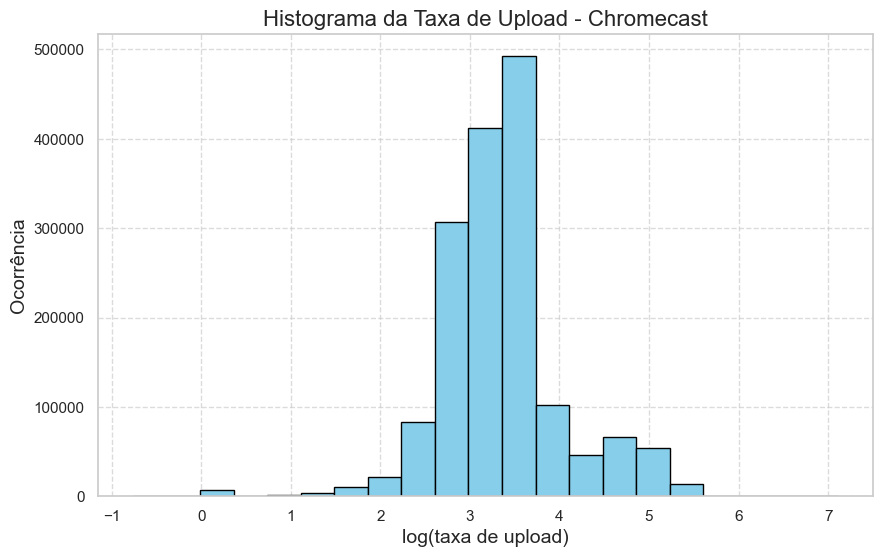

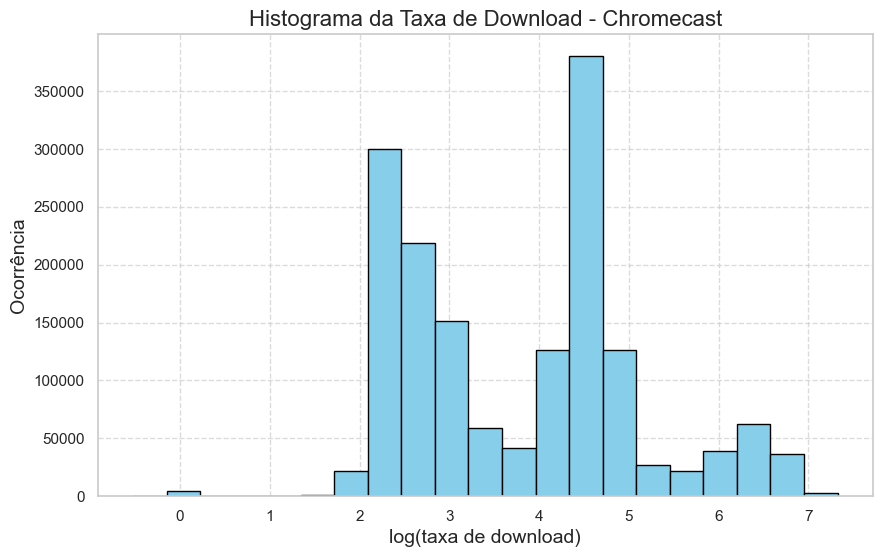

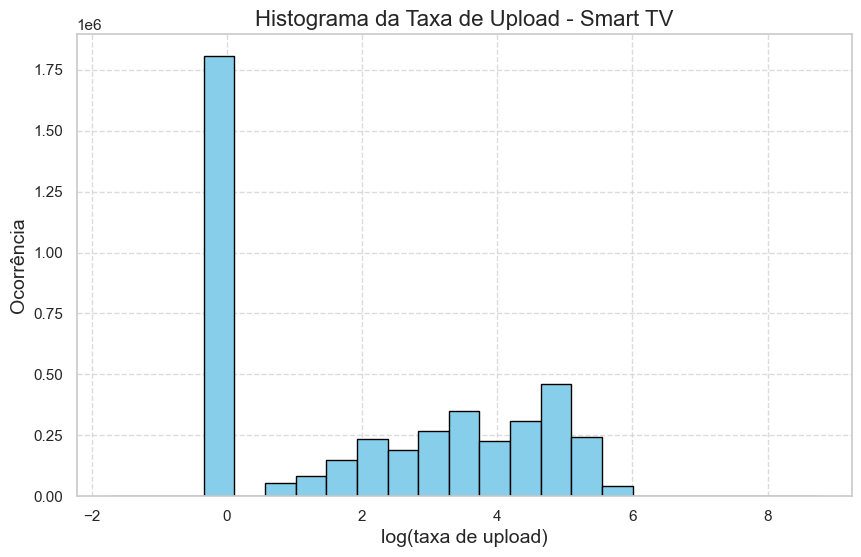

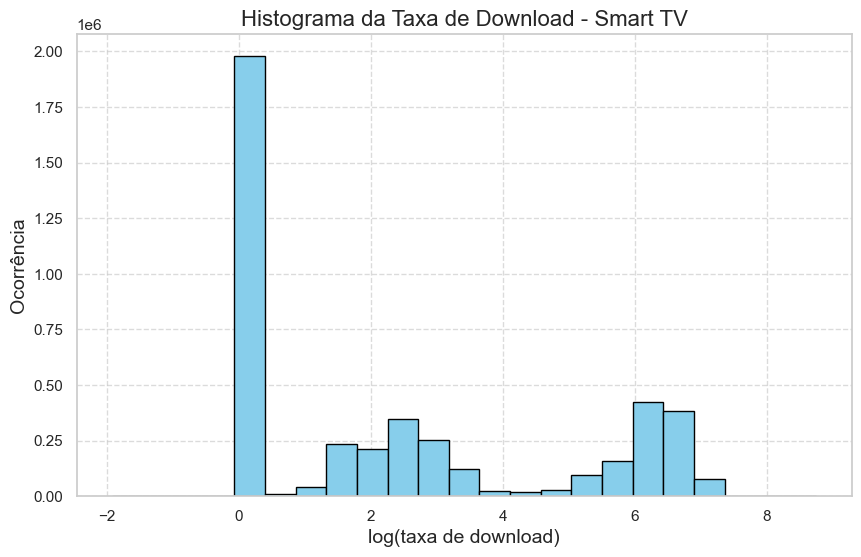

In [4]:
### Histogramas dos Dados

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Função para criar histogramas
def plot_histogram(df, column, title, xlabel, ylabel):
    n = len(df[column])
    m = round(1 + 3.3 * math.log(n, 10))
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=m, edgecolor='black', color='skyblue')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Plotar histogramas para cada dataset e cada taxa
plot_histogram(chromecast_df, "bytes_up", "Histograma da Taxa de Upload - Chromecast", "log(taxa de upload)", "Ocorrência")
plot_histogram(chromecast_df, "bytes_down", "Histograma da Taxa de Download - Chromecast", "log(taxa de download)", "Ocorrência")
plot_histogram(smart_tv_df, "bytes_up", "Histograma da Taxa de Upload - Smart TV", "log(taxa de upload)", "Ocorrência")
plot_histogram(smart_tv_df, "bytes_down", "Histograma da Taxa de Download - Smart TV", "log(taxa de download)", "Ocorrência")

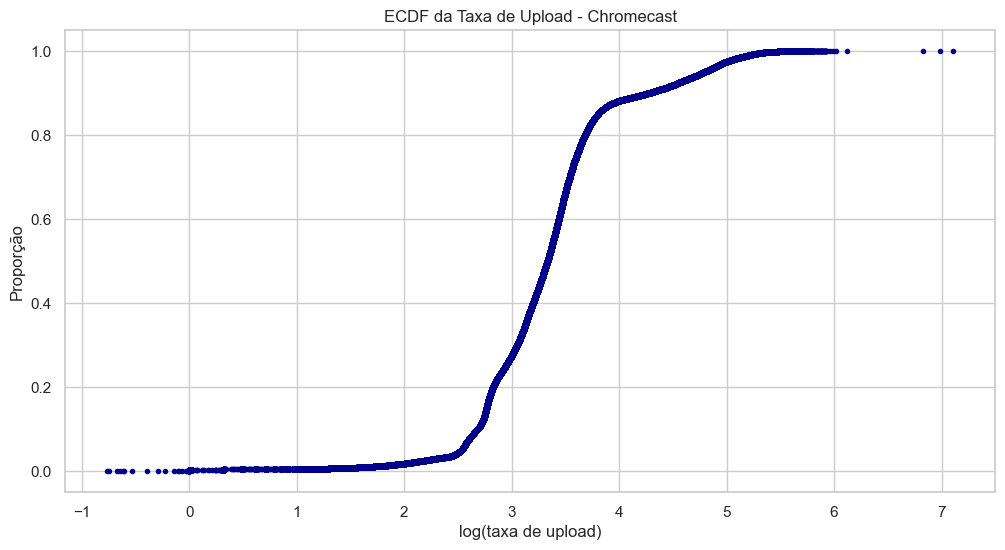

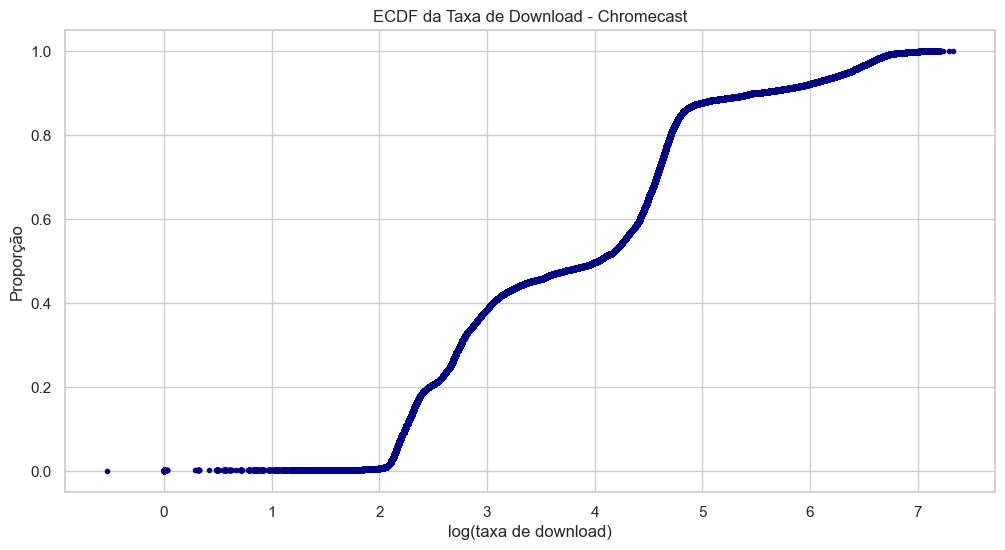

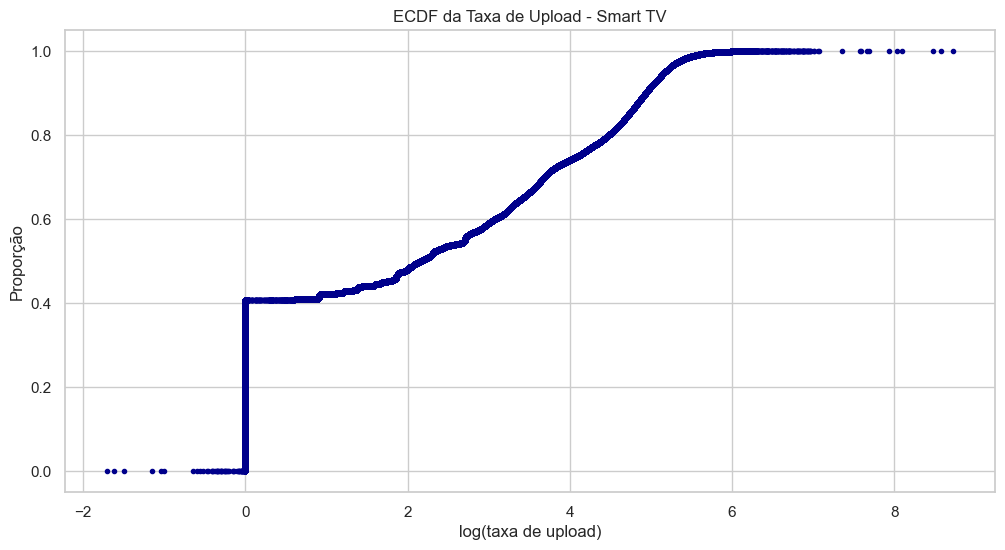

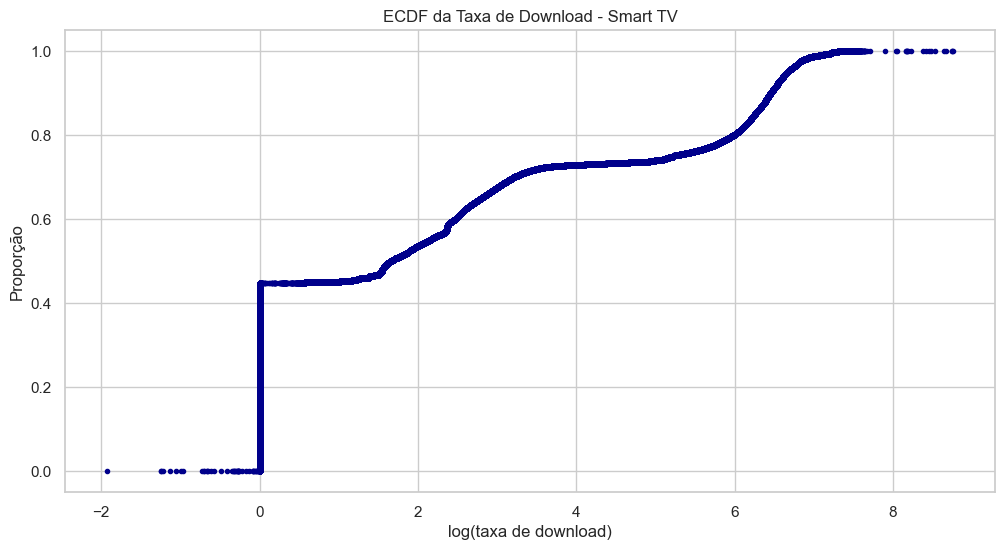

In [8]:
### ECDFs dos Dados

# Função para calcular a ECDF - Função de Distribuição Acumulada Empírica
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

# Plotar ECDFs
def plot_ecdf(df, column, title, xlabel, ylabel):
    x, y = ecdf(df[column])
    plt.figure(figsize=(12, 6))  # Definir o tamanho do gráfico
    plt.plot(x, y, marker='.', linestyle='none', color='darkblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Plotar ECDFs para cada dataset e cada taxa
datasets_ecdf = [
    (chromecast_df, "bytes_up", "ECDF da Taxa de Upload - Chromecast", "log(taxa de upload)", "Proporção"),
    (chromecast_df, "bytes_down", "ECDF da Taxa de Download - Chromecast", "log(taxa de download)", "Proporção"),
    (smart_tv_df, "bytes_up", "ECDF da Taxa de Upload - Smart TV", "log(taxa de upload)", "Proporção"),
    (smart_tv_df, "bytes_down", "ECDF da Taxa de Download - Smart TV", "log(taxa de download)", "Proporção")
]

for df, column, title, xlabel, ylabel in datasets_ecdf:
    plot_ecdf(df, column, title, xlabel, ylabel)

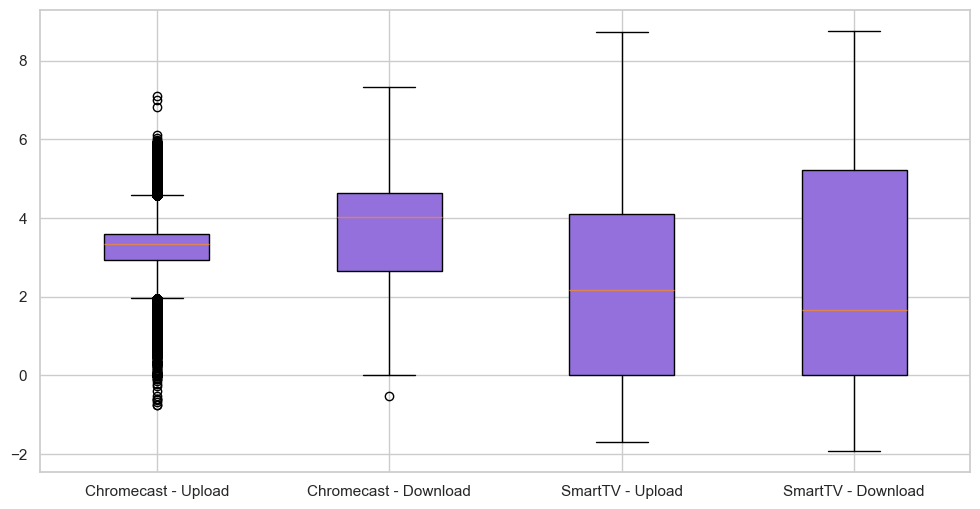

In [6]:
### Boxplots dos Dados

fig, ax = plt.subplots(figsize=(12, 6))  # Aumentar a largura do gráfico

bp = ax.boxplot([chromecast_df['bytes_up'], chromecast_df['bytes_down'], 
                 smart_tv_df['bytes_up'], smart_tv_df['bytes_down']], patch_artist=True)

colors = ['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['Chromecast - Upload', 'Chromecast - Download', 'SmartTV - Upload', 'SmartTV - Download'])

plt.show()

In [7]:
### Estatísticas Descritivas

# Função para calcular estatísticas
def calculate_statistics(df, column):
    mean = df[column].mean()
    variance = df[column].var()
    std_dev = df[column].std()
    return mean, variance, std_dev

# Calcular estatísticas para cada coluna
stats = {
    "Taxa de Upload - Chromecast": calculate_statistics(chromecast_df, "bytes_up"),
    "Taxa de Download - Chromecast": calculate_statistics(chromecast_df, "bytes_down"),
    "Taxa de Upload - Smart TV": calculate_statistics(smart_tv_df, "bytes_up"),
    "Taxa de Download - Smart TV": calculate_statistics(smart_tv_df, "bytes_down")
}

# Criar DataFrame para exibir as estatísticas
stats_df = pd.DataFrame(stats, index=["Média", "Variância", "Desvio Padrão"])

# Exibir a tabela com os dados calculados
styled_stats_df = stats_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('border', '1px solid black')]},
        {'selector': 'caption', 'props': [('background-color', '#1a5a8a'), ('color', 'white'), ('font-size', '16px')]}
    ]
).set_properties(
    **{
        'background-color': '#eaf2f8',
        'border': '1px solid black',
        'text-align': 'center',
        'color': 'black'
    }
).set_caption("Estatísticas Descritivas")

display(styled_stats_df)



# Criar markdown com os dados calculados
chromecast_upload_stats = stats["Taxa de Upload - Chromecast"]
chromecast_download_stats = stats["Taxa de Download - Chromecast"]
smart_tv_upload_stats = stats["Taxa de Upload - Smart TV"]
smart_tv_download_stats = stats["Taxa de Download - Smart TV"]

markdown_text = f"""
### Chromecast
A média da taxa de upload é  {chromecast_upload_stats[0]} e a da taxa de download é  {chromecast_download_stats[0]};  
A variância da taxa de upload é  {chromecast_upload_stats[1]} e a da taxa de download é  {chromecast_download_stats[1]};  
O desvio padrão da taxa de upload é  {chromecast_upload_stats[2]} e o da taxa de download é  {chromecast_download_stats[2]}.

### Smart TV
A média da taxa de upload é  {smart_tv_upload_stats[0]} e a da taxa de download é  {smart_tv_download_stats[0]};  
A variância da taxa de upload é  {smart_tv_upload_stats[1]} e a da taxa de download é  {smart_tv_download_stats[1]};  
O desvio padrão da taxa de upload é  {smart_tv_upload_stats[2]} e o da taxa de download é  {smart_tv_download_stats[2]}.
"""

# Exibir o markdown
from IPython.display import Markdown, display
display(Markdown(markdown_text))

,Taxa de Upload - Chromecast,Taxa de Download - Chromecast,Taxa de Upload - Smart TV,Taxa de Download - Smart TV
Média,3.349672,3.799335,2.156590,2.350173
Variância,0.461600,1.665980,4.113083,6.723921
Desvio Padrão,0.679412,1.290728,2.028074,2.593052



### Chromecast
A média da taxa de upload é  3.3496717251158694 e a da taxa de download é  3.799335488086478;  
A variância da taxa de upload é  0.46160016892790373 e a da taxa de download é  1.6659798143232258;  
O desvio padrão da taxa de upload é  0.6794116343777928 e o da taxa de download é  1.2907284045542757.

### Smart TV
A média da taxa de upload é  2.1565902037563727 e a da taxa de download é  2.3501726398959035;  
A variância da taxa de upload é  4.113082752316163 e a da taxa de download é  6.723920763635552;  
O desvio padrão da taxa de upload é  2.028073655545124 e o da taxa de download é  2.5930524027939645.


## Estatísticas por horário

Para cada tipo de dispositivo,
Smart-TV e Chromecast, para cada hora calcular: Box Plot, M ́edia, Variˆancia e Desvio
Padr ̃ao, para a taxa de upload e taxa de download.